The first part of the dataset consists of Citi Bike trip data files from various months and years, but specifically focuses on Jersey City data instead of the entire NYC dataset. Each file represents trips recorded during a specific month and contains columns with detailed information about each ride, including:

1. Trip Duration
2. Start Time & End Time
3. Start Station Name & End Station Name
4. Start Station Latitude & Longitude
5. User Type: whether the user is a "Subscriber" (member) or "Customer" (casual user)
6. Birth Year
7. Gender


# PART 1: Jersey City Data (2016-01 to 2023-12)
We will use the full Jersey City Citi Bike dataset from January 2016 to December 2023 for general trend analysis, such as examining gender distribution, identifying hourly peak usage patterns, and exploring seasonal or yearly ridership trends. The smaller size of this dataset makes it manageable for comprehensive longitudinal analysis.

## Why Jersey City Data is Used Instead of Full NYC Data:

Dataset Size: The full NYC Citi Bike dataset is enormous, containing millions of records for each month. Processing and analyzing such a large dataset would be computationally intensive and time-consuming, especially in environments with limited memory or processing power.

By narrowing the scope to Jersey City, we are able to track changes over time effectively and gain insights without being overwhelmed by the size of the NYC dataset.

While smaller than the NYC dataset, Jersey City's data still offers a robust sample of trip patterns, station popularity, and user demographics, making it suitable for trend analysis and visualization.

## Loading Citi Bike Trip Dat:
The dataset consists of multiple files, each representing Citi Bike trip data for a specific month and year. All these files follow a consistent naming convention, starting with JC- (indicating the Jersey City Citi Bike dataset) and including the year and month (e.g., 201604 for April 2016).

Since the filenames are structured this way, we use the glob library to efficiently search and load these files. The glob pattern JC-*.csv matches all files that start with "JC-" and have a .csv extension, allowing us to process all relevant data files without manually specifying each file name.

To identify potential inconsistencies in column naming across files, the code reads the first row of each file and prints the column names.

In [1]:
import pandas as pd
import glob

# Filter files for 2016 to 2023 using glob
all_files = sorted(glob.glob("JC-*.csv"))

for file in all_files:
    try:
        df = pd.read_csv(file, nrows=1)  # Read only the first row for preview
        print(f"File: {file}")
        print(f"Columns: {list(df.columns)}\n")
    except Exception as e:
        print(f"Error reading file {file}: {e}")




File: JC-201604-citibike-tripdata.csv
Columns: ['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID', 'Start Station Name', 'Start Station Latitude', 'Start Station Longitude', 'End Station ID', 'End Station Name', 'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type', 'Birth Year', 'Gender']

File: JC-201605-citibike-tripdata.csv
Columns: ['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID', 'Start Station Name', 'Start Station Latitude', 'Start Station Longitude', 'End Station ID', 'End Station Name', 'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type', 'Birth Year', 'Gender']

File: JC-201606-citibike-tripdata.csv
Columns: ['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID', 'Start Station Name', 'Start Station Latitude', 'Start Station Longitude', 'End Station ID', 'End Station Name', 'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type', 'Birth Year', 'Gender']

File: JC-201607-citibike-tripda

## Identifying Inconsistencies, and Standardizing Columns in Citi Bike Data


This process revealed discrepancies in column naming conventions, such as:

1. starttime vs. started_at vs. Start Time
2. end station name vs. end_station_name vs. End Station Name

We used a function, standardize_columns, to rename inconsistent column names into a uniform format. It uses the rename method to map various variations of column names (e.g., starttime, started_at) to a consistent standard (Start Time).

After identifying and standardizing column names, the data from all files is combined into a single DataFrame. The column standardization is applied during the concatenation process to ensure consistency across all files.

In [2]:

# Standardize column names
def standardize_columns(df):
    df.rename(
        columns={
            'started_at': 'Start Time',
            'starttime': 'Start Time',
            'Start Time': 'Start Time',
            'ended_at': 'End Time',
            'stoptime': 'End Time',
            'Stop Time': 'End Time',
            'start station name': 'Start Station Name',
            'start_station_name': 'Start Station Name',
            'Start Station Name': 'Start Station Name',
            'end station name': 'End Station Name',
            'end_station_name': 'End Station Name',
            'End Station Name': 'End Station Name',
            'member_casual': 'Membership',
            'User Type': 'Membership',
            'usertype': 'Membership',
            'Birth Year': 'Birth Year',
            'birth year': 'Birth Year',
            'Gender': 'Gender',
            'gender': 'Gender',
            'start_lat':'Start Station Latitude',
            'start station latitude':'Start Station Latitude',
            'Start Station Latitude':'Start Station Latitude',
            'end_lat':'End Station Latitude',
            'end station latitude':'End Station Latitude',
            'End Station Latitude':'End Station Latitude',
            'start_lng':'Start Station Longitude',
            'start station longitude':'Start Station Longitude',
            'Start Station Longitude':'Start Station Longitude',
            'end_lng':'End Station Longitude',
            'end station longitude':'End Station Longitude',
            'End Station Longitude':'End Station Longitude',

        },
        inplace=True
    )
    return df


combined_df = pd.concat(
    (standardize_columns(pd.read_csv(file)) for file in all_files),
    ignore_index=True
)

## Standardizing the Membership Column and Visualizing Changes

In the original dataset, the Membership column contains inconsistent terminology for the same user types:
1. "Customer" is equivalent to "Casual" riders (users who do not have a membership and use the service occasionally).
2. "Subscriber" is equivalent to "Member" riders (users who have an active subscription or membership).

Standardizing these labels to "Casual" and "Member" ensures consistency across all datasets.

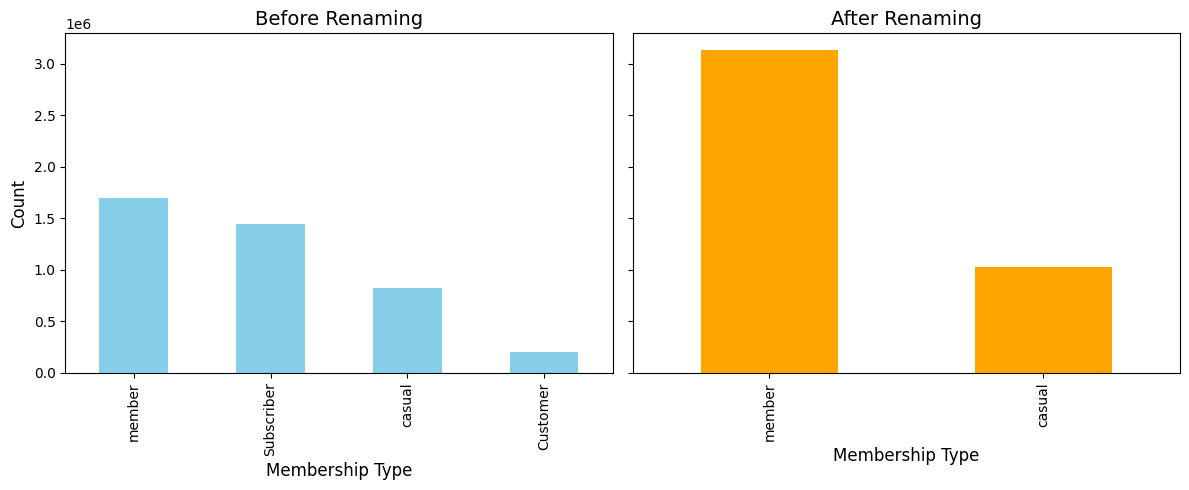

In [3]:
import matplotlib.pyplot as plt

# Create a copy of the original data before renaming
before_renaming = combined_df.copy()

# Replace values in the Membership column for after renaming
combined_df['Membership'] = combined_df['Membership'].str.strip().str.lower()
combined_df['Membership'] = combined_df['Membership'].replace({
    'customer': 'casual',
    'subscriber': 'member'
})

# Get value counts before and after renaming
before_counts = before_renaming['Membership'].value_counts()
after_counts = combined_df['Membership'].value_counts()

# comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)


before_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Before Renaming", fontsize=14)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].set_xlabel("Membership Type", fontsize=12)

after_counts.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title("After Renaming", fontsize=14)
axes[1].set_xlabel("Membership Type", fontsize=12)

plt.tight_layout()
plt.show()



##  Count and Remove Null Values

The count() method counts non-null values for each specified column.

Then we convert the values in the Start Time column to a standard datetime format,

Then we remove rows where any of the specified columns have missing (NaN) values. This is to ensure that all key fields required for analysis are complete.

After data cleaning, the DataFrame has 4,132,098 rows.

In [4]:
print(f"Combined DataFrame Shape: {combined_df.shape}")

# Count non-null values for specified columns
column_counts = combined_df[['Start Time', 'End Time', 'Start Station Name', 'End Station Name', 'Membership','Start Station Latitude','End Station Latitude','Start Station Longitude','End Station Longitude']].count()

print("\nNon-Null Value Counts:")
print(column_counts)

Combined DataFrame Shape: (4166932, 23)

Non-Null Value Counts:
Start Time                 4166932
End Time                   4166932
Start Station Name         4166837
End Station Name           4156909
Membership                 4166435
Start Station Latitude     4166932
End Station Latitude       4161776
Start Station Longitude    4166932
End Station Longitude      4161776
dtype: int64


In [5]:
combined_df['Start Time'] = pd.to_datetime(combined_df['Start Time'], errors='coerce')

combined_df = combined_df.dropna(subset=['Start Time', 'End Time', 'Start Station Name', 'End Station Name', 'Membership','Start Station Latitude','End Station Latitude','Start Station Longitude','End Station Longitude'])
print(f"Filtered DataFrame Shape: {combined_df.shape}")
print(combined_df[['Start Time', 'End Time', 'Start Station Name', 'End Station Name', 'Membership','Start Station Latitude','End Station Latitude','Start Station Longitude','End Station Longitude']].head())

Filtered DataFrame Shape: (4132098, 23)
           Start Time             End Time Start Station Name  \
0 2016-04-01 00:16:13  2016-04-01 00:50:58      Hamilton Park   
1 2016-04-01 00:32:48  2016-04-01 00:38:13       Newport PATH   
2 2016-04-01 02:00:33  2016-04-01 02:07:00  5 Corners Library   
3 2016-04-01 02:11:43  2016-04-01 02:14:03    McGinley Square   
4 2016-04-01 02:18:01  2016-04-01 02:20:23            Sip Ave   

  End Station Name Membership  Start Station Latitude  End Station Latitude  \
0     Brunswick St     member               40.727596             40.724176   
1    Hamilton Park     member               40.727224             40.727596   
2      Central Ave     member               40.734961             40.746730   
3          Sip Ave     member               40.725340             40.730743   
4  McGinley Square     member               40.730743             40.725340   

   Start Station Longitude  End Station Longitude  
0               -74.044247             -74

## Number of Rides Per Year

We filter the dataset year by year based on the Start Time and counts the # of rides for each year.

The total number of rides has been increasing steadily over the years, except for 2020, where ridership dropped due to the COVID-19 pandemic. The data indicates a clear recovery and growth trend after COVID-19, shows increasing popularity and expansion of Citi Bike.



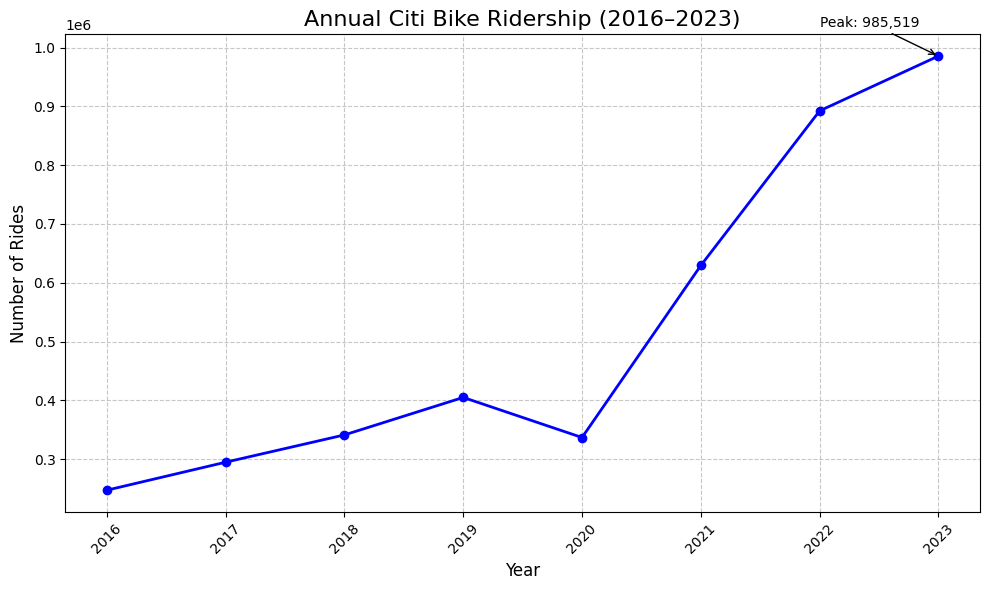

In [6]:

# Extract the year from 'Start Time'
combined_df['Year'] = combined_df['Start Time'].dt.year

# Group by year and calculate the number of rides
rides_per_year = combined_df.groupby('Year').size().reset_index(name='Ride Count')

plt.figure(figsize=(10, 6))
plt.plot(rides_per_year['Year'], rides_per_year['Ride Count'], marker='o', color='blue', linewidth=2)

plt.title('Annual Citi Bike Ridership (2016–2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rides_per_year['Year'], rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)

max_year = rides_per_year.loc[rides_per_year['Ride Count'].idxmax()]
plt.annotate(
    f"Peak: {max_year['Ride Count']:,}",
    xy=(max_year['Year'], max_year['Ride Count']),
    xytext=(max_year['Year'] - 1, max_year['Ride Count'] + 50000),
    arrowprops=dict(facecolor='black', arrowstyle="->"),
    fontsize=10
)


plt.tight_layout()
plt.show()


## Hourly Citibike Usage


We extract the hour from the Start Time column and groups the data by hour to calculate ride counts.

Peak occurs during morning (7-9 AM) and evening (4-7 PM) rush hours, which aligns with commuter patterns.

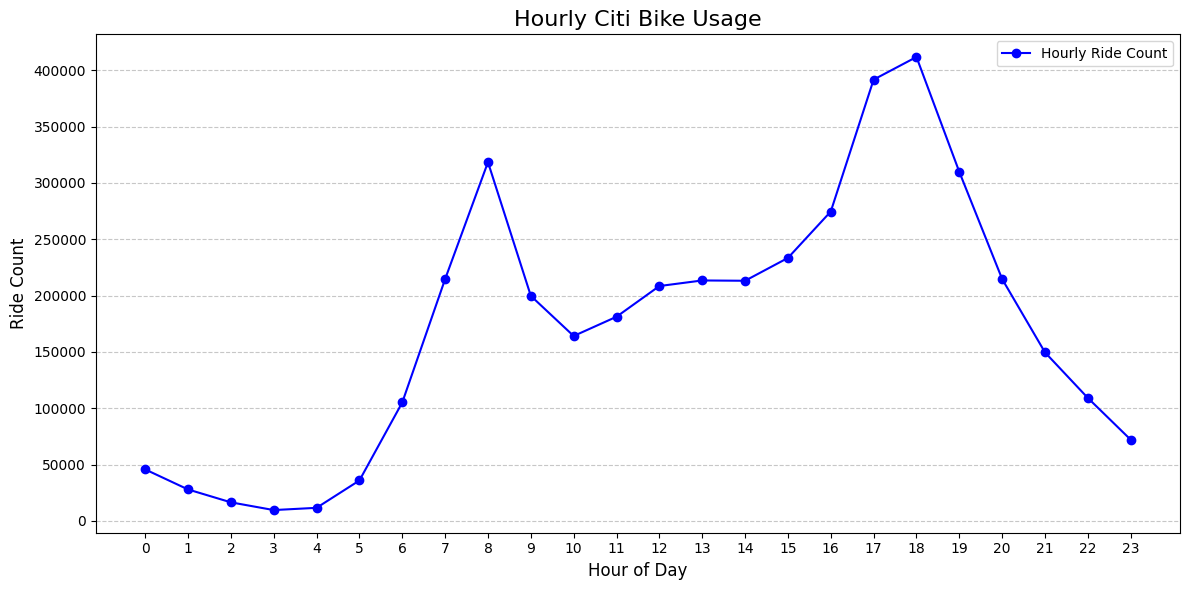

In [7]:
# Extract hour from 'Start Time' for hourly analysis
combined_df['hour'] = combined_df['Start Time'].dt.hour

# Group data by hour to calculate ride count per hour
hourly_usage = combined_df.groupby('hour').size().reset_index(name='ride_count')


plt.figure(figsize=(12, 6))
plt.plot(hourly_usage['hour'], hourly_usage['ride_count'], marker='o', color='blue', label='Hourly Ride Count')
plt.title('Hourly Citi Bike Usage', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Ride Count', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()


## Demographic Insights - Gender




Starting from 2021 there is no gender and birth year, so if we want to analyze that we need to use data before 2021

Analyze the distribution of rides by gender, focusing on the 2016–2020 period when gender information was recorded.

The plot shows that a significantly larger number of rides were taken by males (over 1.1 million rides) compared to females (361,438 rides) during the period analyzed.

In [8]:
# Gender was only taken into account from 2016-2020, so we will filter the data as needed by removing the null values in the larger dataset to analyze the data

gender_filtered_df = combined_df[combined_df['Gender'].notna()]

# Map numerical values to gender labels
gender_mapping = {
    0: None,   # 0 becomes None (null)
    1: 'Male', # 1 becomes Male
    2: 'Female' # 2 becomes Female
}

# Replace Gender values in the DataFrame
gender_filtered_df['Gender'] = gender_filtered_df['Gender'].replace(gender_mapping)



<ipython-input-8-1e3b794204e9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_filtered_df['Gender'] = gender_filtered_df['Gender'].replace(gender_mapping)


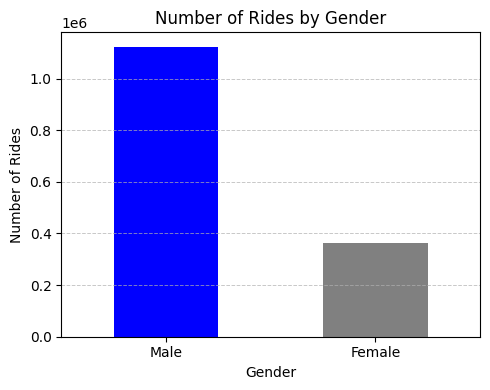

,count
Gender,
Male,1123128
Female,361438


In [9]:

# Count the number of rides per gender
gender_counts = gender_filtered_df['Gender'].value_counts()

# Plot the counts
plt.figure(figsize=(5, 4))
gender_counts.plot(kind='bar', color=['blue', 'gray'])  # Customize colors if needed
plt.title("Number of Rides by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Rides")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)  # Grid only on y-axis

plt.tight_layout()
plt.show()

gender_counts

## Demographic Insights - Age

The histogram shows that most riders fall between 20 and 50 years old, with a sharp decline in frequency for ages beyond 60.

The most frequent age group appears to be in the late 20s to early 30s, suggesting that younger adults are the primary users of Citi Bike.


<ipython-input-10-0862f51aa28a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bgfiltered_df = birthyear_filtered_df.replace(gender_mapping)


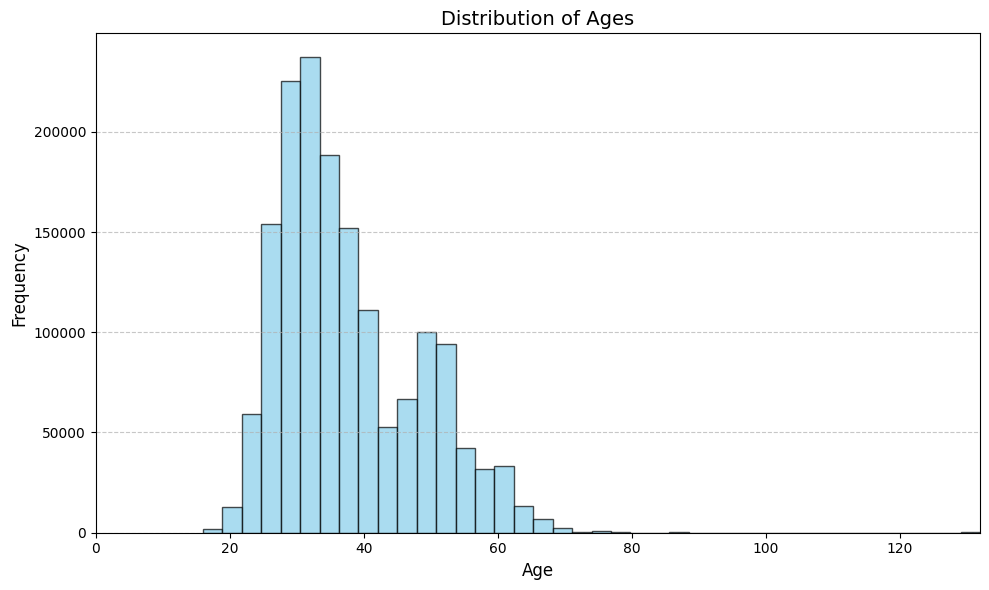

In [10]:
birthyear_filtered_df = combined_df[combined_df['Birth Year'].notna()]
bgfiltered_df = birthyear_filtered_df.replace(gender_mapping)

bgfiltered_df["Birth Year"] = bgfiltered_df["End Time"].str[:4].astype(int) - bgfiltered_df["Birth Year"]

# Rename the column to 'Age'
bgfiltered_df.rename(columns={"Birth Year": "Age"}, inplace=True)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.hist(bgfiltered_df['Age'], bins=40, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Ages", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim(0, bgfiltered_df['Age'].max())
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## Demographic Insights - Membership

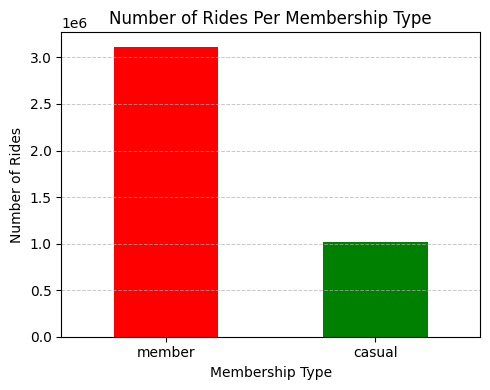

,count
Membership,
member,3113582
casual,1018516


In [11]:
member_filtered_df = combined_df[combined_df['Membership'].notna()]
member_counts = member_filtered_df['Membership'].value_counts()

# Plot the counts
plt.figure(figsize=(5, 4))
member_counts.plot(kind='bar', color=['red', 'green'])  # Customize colors if needed
plt.title("Number of Rides Per Membership Type")
plt.xlabel("Membership Type")
plt.ylabel("Number of Rides")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)  # Grid only on y-axis

plt.tight_layout()
plt.show()
member_filtered_df['Membership'].value_counts()
#overwhelmingly subscribers over customers

## Demographic Insights - Relationship between membership and ride duration

Computes the duration of each ride by subtracting the Start Time from the End Time. The result is converted from seconds to minutes.

Casual riders often rent bikes for leisure or exploratory purposes, while members use them primarily for shorter, more routine trips.

In [12]:
# Ensure End Time is in datetime format in the original DataFrame
combined_df['End Time'] = pd.to_datetime(combined_df['End Time'], errors='coerce')
member_filtered_df = combined_df[combined_df['Membership'].notna()]

# Calculate duration in minutes
member_filtered_df['Ride Duration (Minutes)'] = (
    member_filtered_df['End Time'] - member_filtered_df['Start Time']
).dt.total_seconds() / 60

grouped_data = member_filtered_df.groupby('Membership')['Ride Duration (Minutes)'].mean()
grouped_data


,Ride Duration (Minutes)
Membership,
casual,27.316065
member,9.891686


Members (orange bars): The ride counts for members peak during morning hours (around 7–9 AM) and evening hours (4–6 PM). These peaks correspond to typical commuting times, suggesting that members predominantly use Citi Bike for work commutes.

Casual Riders (blue bars): These are non-subscribers or occasional riders, possibly tourists or irregular users.The casual ridership increases steadily throughout the day and peaks in the afternoon (4–5 PM). This pattern aligns with leisure activities or exploration, common among tourists or occasional users.



<Figure size 1200x600 with 0 Axes>

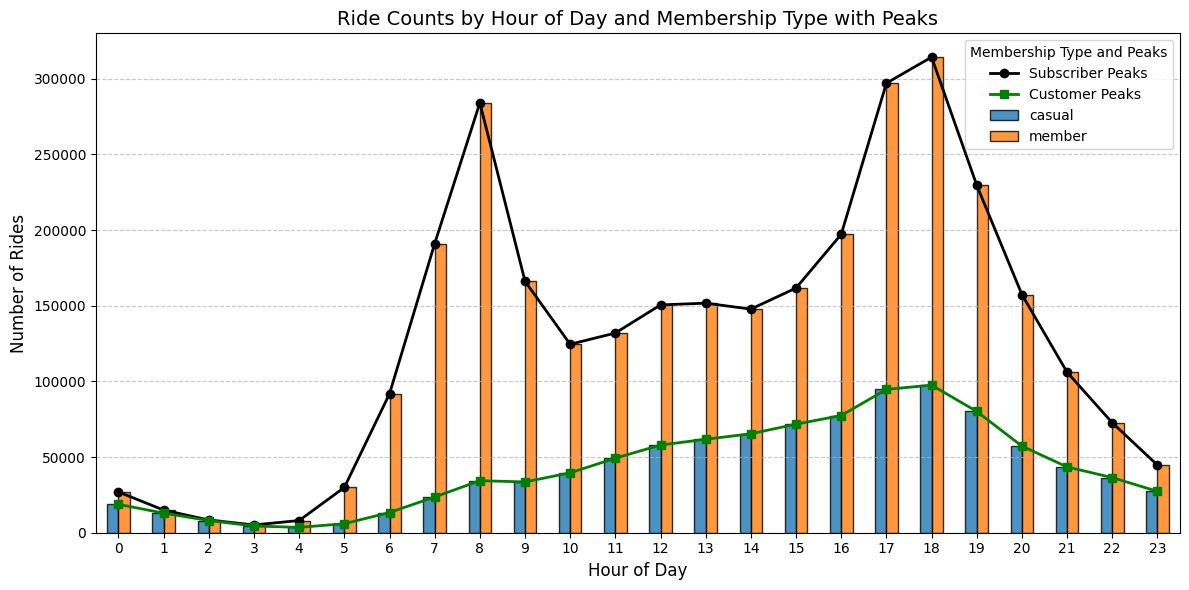

In [13]:

# Extract the hour of the day
member_filtered_df['Hour'] = member_filtered_df['Start Time'].dt.hour

# Group by Membership and Hour, count the number of rides
hourly_counts = member_filtered_df.groupby(['Membership', 'Hour']).size().unstack(fill_value=0)

# Calculate the peak (max) for each membership type
subscriber_peaks = hourly_counts.loc['member']
customer_peaks = hourly_counts.loc['casual']

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
hourly_counts.T.plot(kind='bar', figsize=(12, 6), edgecolor='black', alpha=0.8)

# Add the lines tracing the peaks
plt.plot(subscriber_peaks.index, subscriber_peaks.values, marker='o', color='black', label='Subscriber Peaks', linewidth=2)
plt.plot(customer_peaks.index, customer_peaks.values, marker='s', color='green', label='Customer Peaks', linewidth=2)

# Add titles and labels
plt.title("Ride Counts by Hour of Day and Membership Type with Peaks", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Membership Type and Peaks", fontsize=10)

plt.tight_layout()
plt.show()


## Holiday Impact

We calculate ride counts grouped by the relative day (distance from Christmas) and year, visualizing the trend with a line plot.

Similarly, we determine the fourth Thursday of November for each year (Thanksgiving) and filters data for 7 days before and after. Ride counts are grouped and visualized as a line plot for each year relative to Thanksgiving.


Ridership consistently drops sharply on Christmas Day across all years, followed by a rebound in the days after, reflecting reduced activity on the holiday and post-holiday recovery.
A similar dip is observed on Thanksgiving Day, though the drop is less obvious compared to Christmas. The days before Thanksgiving generally show higher ridership, potentially due to preparation and travel activities, with a rebound after the holiday.

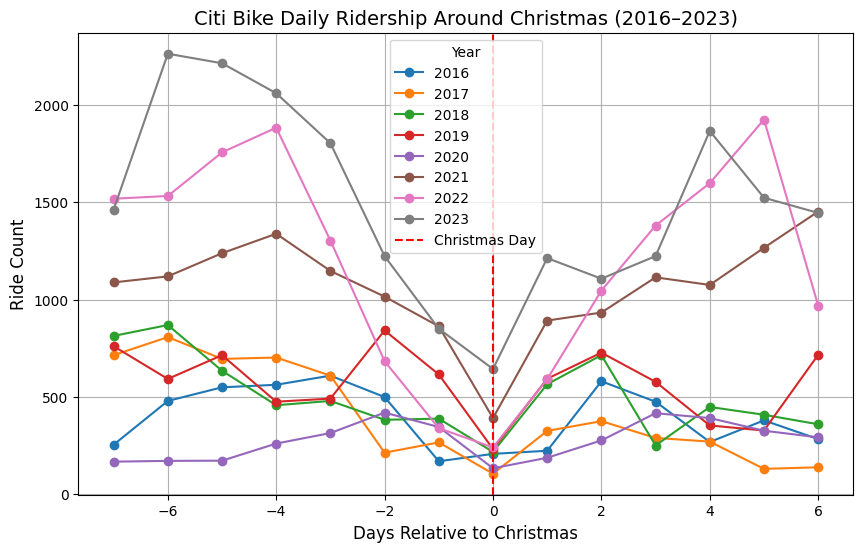

In [14]:
christmas_dates = [pd.Timestamp(f"{year}-12-25") for year in range(2016, 2024)]

# Filter data for 7 days before and after Christmas for each year
christmas_data = []

for christmas_date in christmas_dates:
    start_date = christmas_date - pd.Timedelta(days=7)
    end_date = christmas_date + pd.Timedelta(days=7)

    filtered_df = combined_df[(combined_df['Start Time'] >= start_date) & (combined_df['Start Time'] <= end_date)].copy()
    filtered_df['relative_day'] = (filtered_df['Start Time'] - christmas_date).dt.days
    filtered_df['year'] = christmas_date.year
    christmas_data.append(filtered_df)

christmas_combined = pd.concat(christmas_data, ignore_index=True)

daily_ridership = christmas_combined.groupby(['relative_day', 'year']).size().reset_index(name='ride_count')


plt.figure(figsize=(10, 6))
for year in daily_ridership['year'].unique():
    year_data = daily_ridership[daily_ridership['year'] == year]
    plt.plot(year_data['relative_day'], year_data['ride_count'], marker='o', label=str(year))

plt.axvline(0, color='red', linestyle='--', label='Christmas Day')
plt.title('Citi Bike Daily Ridership Around Christmas (2016–2023)', fontsize=14)
plt.xlabel('Days Relative to Christmas', fontsize=12)
plt.ylabel('Ride Count', fontsize=12)
plt.legend(title="Year")
plt.grid(True)
plt.show()



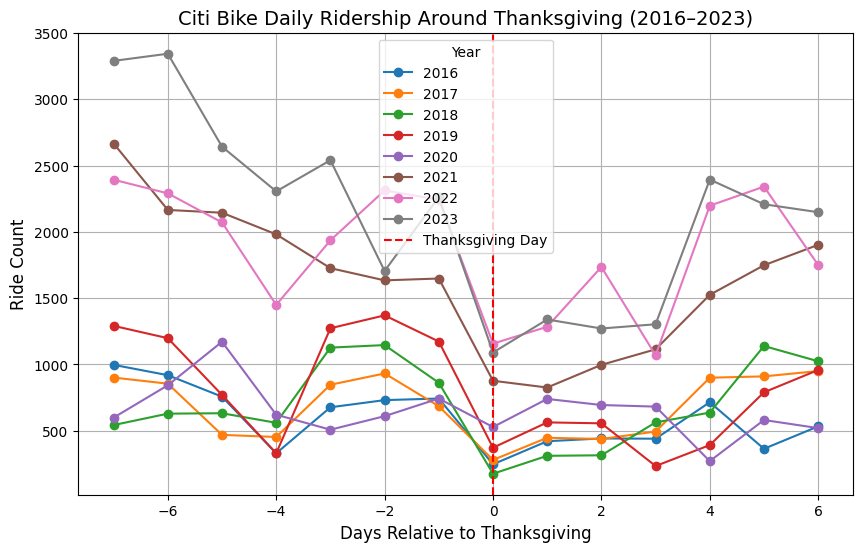

In [15]:
# Define the Thanksgiving dates for the years 2016–2023 (Fourth Thursday of November)
thanksgiving_dates = [
    pd.Timestamp(f"{year}-11-01") + pd.offsets.WeekOfMonth(week=3, weekday=3)
    for year in range(2016, 2024)
]

# Filter data for 7 days before and after Thanksgiving for each year
thanksgiving_data = []

for thanksgiving_date in thanksgiving_dates:
    start_date = thanksgiving_date - pd.Timedelta(days=7)
    end_date = thanksgiving_date + pd.Timedelta(days=7)

    filtered_df = combined_df[(combined_df['Start Time'] >= start_date) & (combined_df['Start Time'] <= end_date)].copy()
    filtered_df['relative_day'] = (filtered_df['Start Time'] - thanksgiving_date).dt.days
    filtered_df['year'] = thanksgiving_date.year
    thanksgiving_data.append(filtered_df)

# Combine all years' data
thanksgiving_combined = pd.concat(thanksgiving_data, ignore_index=True)

# Group by relative_day and year to calculate ride counts
daily_ridership = thanksgiving_combined.groupby(['relative_day', 'year']).size().reset_index(name='ride_count')

plt.figure(figsize=(10, 6))
for year in daily_ridership['year'].unique():
    year_data = daily_ridership[daily_ridership['year'] == year]
    plt.plot(year_data['relative_day'], year_data['ride_count'], marker='o', label=str(year))

plt.axvline(0, color='red', linestyle='--', label='Thanksgiving Day')
plt.title('Citi Bike Daily Ridership Around Thanksgiving (2016–2023)', fontsize=14)
plt.xlabel('Days Relative to Thanksgiving', fontsize=12)
plt.ylabel('Ride Count', fontsize=12)
plt.legend(title="Year")
plt.grid(True)
plt.show()


## Seasonal Trend


In [16]:
# Calculate duration in minutes
combined_df['Ride Duration (Minutes)'] = (
    combined_df['End Time'] - combined_df['Start Time']
).dt.total_seconds() / 60


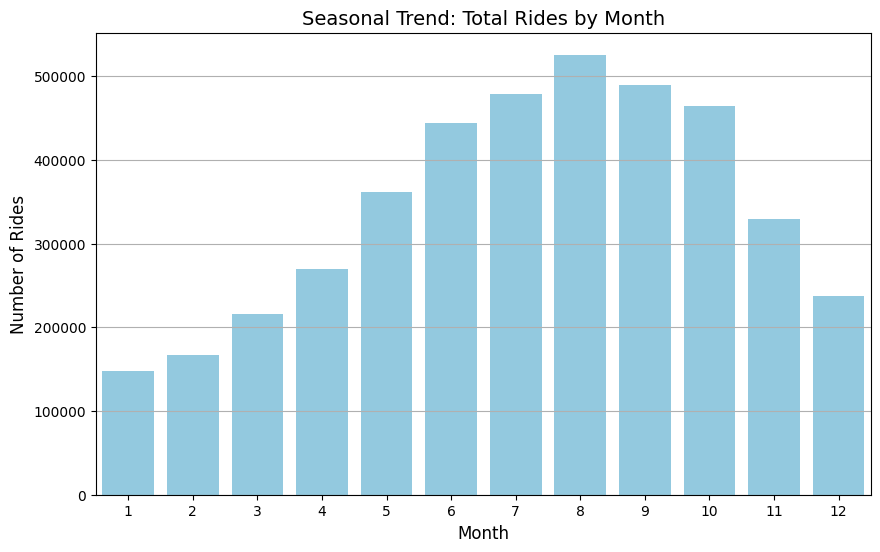

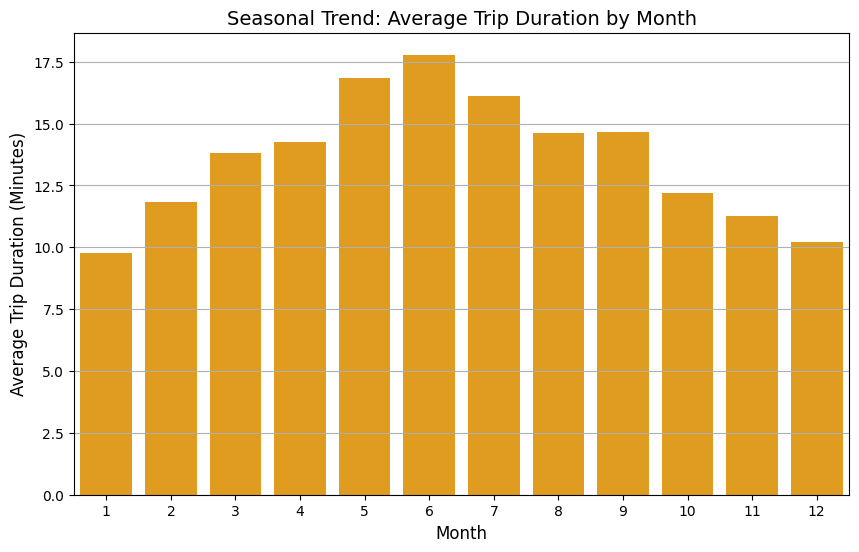

In [18]:
import seaborn as sns

combined_df['Month'] = combined_df['Start Time'].dt.month

# Group data by month to calculate metrics
monthly_trend = combined_df.groupby('Month').agg(
    Total_Rides=('Ride Duration (Minutes)', 'count'),  # Total rides per month
    Avg_Trip_Duration=('Ride Duration (Minutes)', 'mean')  # Average trip duration per month
).reset_index()

# Plot seasonal trend for number of ridership
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_trend, x='Month', y='Total_Rides', color='skyblue')
plt.title('Seasonal Trend: Total Rides by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.grid(True, axis='y')
plt.show()

# Plot seasonal trend for average trip duration
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_trend, x='Month', y='Avg_Trip_Duration', color='orange')
plt.title('Seasonal Trend: Average Trip Duration by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Trip Duration (Minutes)', fontsize=12)
plt.grid(True, axis='y')
plt.show()


<ipython-input-19-649aaf3aa993>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x='Month', y='Ride Duration (Minutes)', showfliers=False, palette='coolwarm')


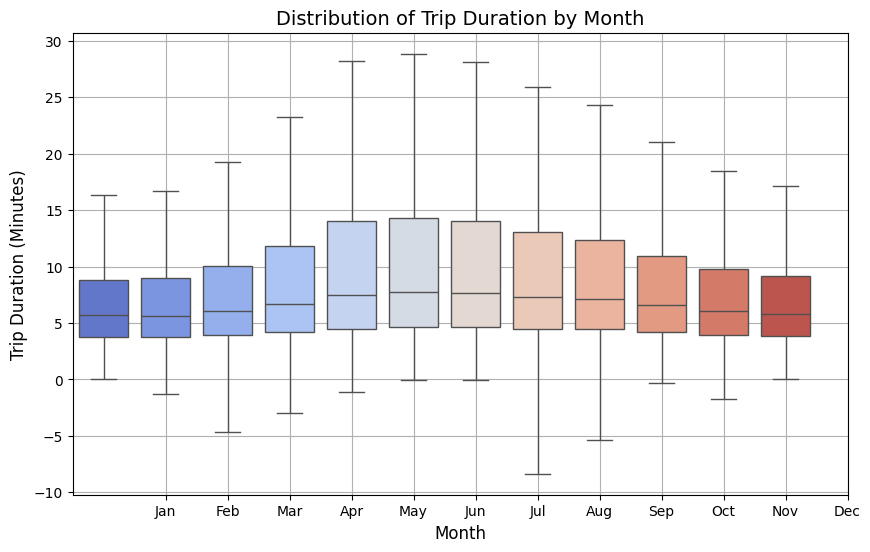

In [19]:
# Boxplot: Distribution of trip duration by month
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Month', y='Ride Duration (Minutes)', showfliers=False, palette='coolwarm')
plt.title('Distribution of Trip Duration by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Trip Duration (Minutes)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


The bar plot demonstrates that the number of rides peaks during the summer months (July and August), coinciding with warmer weather, and decreases significantly during the winter months (December and January).

The boxplot illustrates the distribution of trip durations, highlighting that longer trips are more common in the summer months, especially in May, June, and July, with shorter trips dominating in the colder months. These trends align with typical outdoor activity patterns, where warmer weather encourages higher usage and longer trips.

## Weather Analysis


This process involves analyzing Jersey City Citi Bike trip data for 2019. Trip duration is calculated in minutes. The dataset is then aggregated to calculate daily ridership metrics, including the total number of rides and the average trip duration for each day. These metrics are merged with cleaned NYC weather data in 2019 to analyze the relationships between weather conditions (temperature and precipitation) and average trip duration.

NYC Weather data in 2019: Weather data collected from the National Weather Service. It contains daily data from all days in 2019. It contains for each day the minimum temperature, maximum temperature, average temperature, precipitation, new snow fall, and current snow depth. The temperature is measured in Fahrenheit and the depth is measured in inches. T means that there is a trace of precipitation.


We use the 2019 weather data because it is one of the most complete and well-documented datasets available, making it ideal for accurate analysis. Additionally, it is widely used on platforms like Kaggle, which ensures its credibility and reliability for research purposes.


In [20]:
# Drop rows with null values in relevant columns and filter for only 2019
filtered_df = combined_df.dropna(subset=['Start Time', 'End Time', 'Start Station Name', 'End Station Name', 'Membership'])
filtered_df = filtered_df[filtered_df['Start Time'].dt.year == 2019]

print(f"Filtered DataFrame Shape: {filtered_df.shape}")


Filtered DataFrame Shape: (404947, 27)


In [21]:
# Ensure Start Time and End Time are in datetime format
filtered_df['Start Time'] = pd.to_datetime(filtered_df['Start Time'], errors='coerce')
filtered_df['End Time'] = pd.to_datetime(filtered_df['End Time'], errors='coerce')

# Calculate Trip Duration in minutes
filtered_df['Trip Duration (Minutes)'] = (filtered_df['End Time'] - filtered_df['Start Time']).dt.total_seconds() / 60

# Check for negative or zero durations and filter them out
filtered_df = filtered_df[filtered_df['Trip Duration (Minutes)'] > 0]

# Group by Date to calculate daily ridership metrics
filtered_df['Date'] = filtered_df['Start Time'].dt.date
daily_rides = filtered_df.groupby('Date').agg(
    Rides=('Trip Duration (Minutes)', 'count'),  # Total rides per day
    Avg_Trip_Duration=('Trip Duration (Minutes)', 'mean')  # Average trip duration in minutes
).reset_index()

In [22]:
# Add a 'Date' column by extracting it from 'Start Time'
filtered_df['Date'] = pd.to_datetime(filtered_df['Start Time']).dt.date

# Group by Date to calculate daily ridership metrics
daily_rides = filtered_df.groupby('Date').agg(
    Rides=('Trip Duration (Minutes)', 'count'),  # Total rides per day
    Avg_Trip_Duration=('Trip Duration (Minutes)', 'mean')  # Average trip duration
).reset_index()

# Preview daily metrics
print(daily_rides.head())

         Date  Rides  Avg_Trip_Duration
0  2019-01-01    431          14.352978
1  2019-01-02    827           6.811185
2  2019-01-03    860           7.948915
3  2019-01-04    900           7.110889
4  2019-01-05    308           6.944264


In [24]:
nyc_temperature = pd.read_csv('nyc_temperature.csv')

nyc_temperature.head()

,date,tmax,tmin,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
0,1/1/19,60,40,50.0,13.9,15,0,0.08,0,0
1,2/1/19,41,35,38.0,2.1,27,0,0,0,0
2,3/1/19,45,39,42.0,6.3,23,0,T,0,0
3,4/1/19,47,37,42.0,6.5,23,0,0,0,0
4,5/1/19,47,42,44.5,9.1,20,0,0.45,0,0


In [25]:
# STEP 0: clean and prepare the NYC temperature dataset

# Convert 'date' to datetime format
nyc_temperature['date'] = pd.to_datetime(nyc_temperature['date'], errors='coerce')

# Replace "T" in 'precipitation' with a small value (trace amount of precipitation)
nyc_temperature['precipitation'] = nyc_temperature['precipitation'].replace('T', 0.01).astype(float)

# Select and rename relevant columns for clarity
weather_cleaned = nyc_temperature[['date', 'tavg', 'precipitation']].rename(
    columns={'date': 'Date', 'tavg': 'Temperature', 'precipitation': 'Precipitation'}
)

# Display the cleaned weather dataset
weather_cleaned.head()

<ipython-input-25-3a28a9990887>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nyc_temperature['date'] = pd.to_datetime(nyc_temperature['date'], errors='coerce')


,Date,Temperature,Precipitation
0,2019-01-01,50.0,0.08
1,2019-02-01,38.0,0.00
2,2019-03-01,42.0,0.01
3,2019-04-01,42.0,0.00
4,2019-05-01,44.5,0.45


In [26]:
# Step 1: Ensure Matching Data Types

# Ensure 'Date' in daily_rides is datetime
daily_rides['Date'] = pd.to_datetime(daily_rides['Date'])

# Ensure 'Date' in weather_cleaned is datetime
weather_cleaned['Date'] = pd.to_datetime(weather_cleaned['Date'])

# Merge Citi Bike data with weather data
merged_data = pd.merge(daily_rides, weather_cleaned, on='Date', how='inner')

# Display the merged dataset
merged_data.head()

,Date,Rides,Avg_Trip_Duration,Temperature,Precipitation
0,2019-01-01,431,14.352978,50.0,0.08
1,2019-01-02,827,6.811185,17.0,0.00
2,2019-01-03,860,7.948915,30.5,0.10
3,2019-01-04,900,7.110889,39.5,0.00
4,2019-01-05,308,6.944264,51.5,0.01


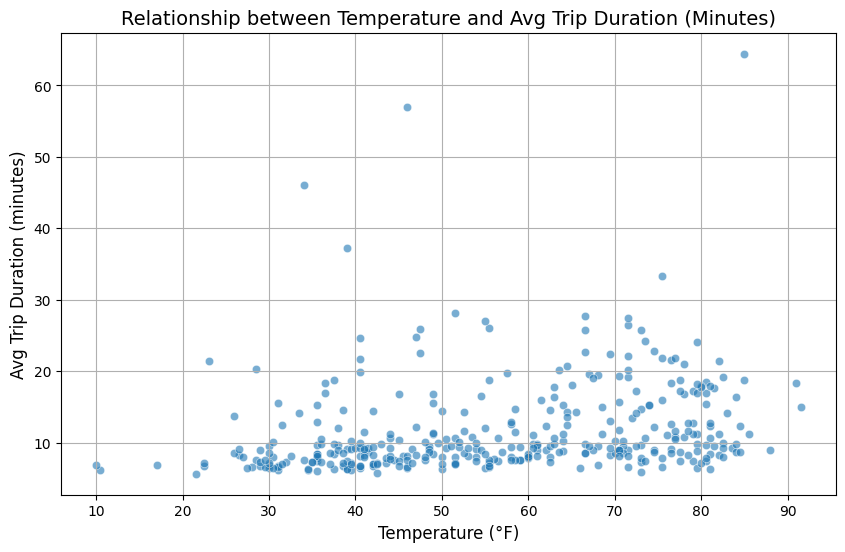

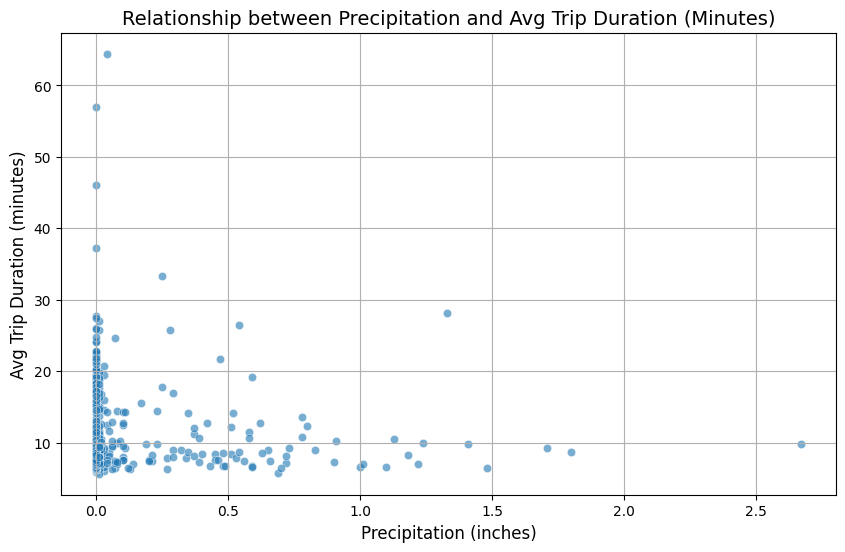

Correlation Analysis:
                   Avg_Trip_Duration  Temperature  Precipitation
Avg_Trip_Duration           1.000000     0.241778      -0.098711
Temperature                 0.241778     1.000000       0.011938
Precipitation              -0.098711     0.011938       1.000000


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 2: Go into the relationship of temp, precipitation VS trip duration (in minutes)

# Relationship between Temperature and Avg_Trip_Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['Temperature'], y=merged_data['Avg_Trip_Duration'], alpha=0.6)
plt.title('Relationship between Temperature and Avg Trip Duration (Minutes)', fontsize=14)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Avg Trip Duration (minutes)', fontsize=12)
plt.grid(True)
plt.show()

# Relationship between Precipitation and Avg_Trip_Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['Precipitation'], y=merged_data['Avg_Trip_Duration'], alpha=0.6)
plt.title('Relationship between Precipitation and Avg Trip Duration (Minutes)', fontsize=14)
plt.xlabel('Precipitation (inches)', fontsize=12)
plt.ylabel('Avg Trip Duration (minutes)', fontsize=12)
plt.grid(True)
plt.show()

# Correlation analysis for overall data
correlation_analysis = merged_data[['Avg_Trip_Duration', 'Temperature', 'Precipitation']].corr()

# Display correlation analysis
print("Correlation Analysis:")
print(correlation_analysis)


Correlation Analysis:

Avg_Trip_Duration and Temperature (0.241779):

A moderate positive correlation (around 0.24) indicates that higher temperatures are generally associated with longer average trip durations. This is expected since warmer weather tends to encourage outdoor activities like cycling.

Avg_Trip_Duration and Precipitation (-0.098710):

A weak negative correlation (close to -0.1) suggests that as precipitation increases, average trip duration slightly decreases. This also makes sense because rain or wet conditions can discourage cycling or make trips shorter.

# PART 2: New York City Data
Due to the significantly larger size of the New York City Citi Bike dataset, we will focus our analysis on October 2024, the most recent and relevant time period available.
New York City, with its greater number of Citi Bike stations and larger population compared to Jersey City, naturally exhibits higher bike usage. Additionally, October's lack of major holidays ensures that the data reflects typical usage patterns without disruptions caused by seasonal or event-related factors.

## Popular stations and routes in NYC (October 2024)


In [28]:
import pandas as pd
import glob

file_pattern = "202410-citibike-tripdata_*.csv"
all_files = glob.glob(file_pattern)

data_frames = [pd.read_csv(file) for file in all_files]
merged_data = pd.concat(data_frames, ignore_index=True)


<ipython-input-28-a9d4d8f1ae7a>:7: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames = [pd.read_csv(file) for file in all_files]
<ipython-input-28-a9d4d8f1ae7a>:7: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames = [pd.read_csv(file) for file in all_files]
<ipython-input-28-a9d4d8f1ae7a>:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames = [pd.read_csv(file) for file in all_files]
<ipython-input-28-a9d4d8f1ae7a>:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames = [pd.read_csv(file) for file in all_files]
<ipython-input-28-a9d4d8f1ae7a>:7: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames = [pd.read_csv(file) for file in all_files]
<ipython-input-28-a9d4d8f1ae7

We counted the unique start and end stations in the dataset.

In [29]:
#1. Count unique stations by combining start and end stations
unique_start_stations = merged_data['start_station_name'].nunique()
unique_end_stations = merged_data['end_station_name'].nunique()

# Combine both start and end stations to find overall unique stations
unique_stations = pd.concat([merged_data['start_station_name'], merged_data['end_station_name']]).nunique()

print("Unique Start Stations:", unique_start_stations)
print("Unique End Stations:", unique_end_stations)
print("Total Unique Stations:", unique_stations)

Unique Start Stations: 2139
Unique End Stations: 2191
Total Unique Stations: 2191


We identified the top 20 most frequently used start and end stations based on ride counts.

In [30]:
#2. Preferred Stations
#Find the top 20 most frequently used start stations
top_start_stations = (
    merged_data.groupby(['start_station_name', 'start_lat', 'start_lng'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .head(20)
)

# Find the top 20 most frequently used end stations
top_end_stations = (
    merged_data.groupby(['end_station_name', 'end_lat', 'end_lng'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .head(20)
)

print("Top 20 Start Stations with Latitude and Longitude:")
print(top_start_stations)
print("\nTop 20 End Stations with Latitude and Longitude:")
print(top_end_stations)

Top 20 Start Stations with Latitude and Longitude:
                  start_station_name  start_lat  start_lng  count
2019                 W 21 St & 6 Ave  40.741740 -73.994156  18526
1938         University Pl & E 14 St  40.734814 -73.992085  17232
1407           Lafayette St & E 8 St  40.730207 -73.991026  17149
442                  8 Ave & W 31 St  40.750585 -73.994685  16469
2170           West St & Chambers St  40.717548 -74.013221  15918
632               Broadway & E 14 St  40.734546 -73.990741  15382
463                  9 Ave & W 33 St  40.752568 -73.996765  14999
675               Broadway & W 58 St  40.766953 -73.981693  14949
2039                 W 31 St & 7 Ave  40.749156 -73.991600  14826
37                  11 Ave & W 41 St  40.760301 -73.998842  14066
665               Broadway & W 25 St  40.742869 -73.989186  13909
1678        Pier 61 at Chelsea Piers  40.746872 -74.008210  13697
792         Cleveland Pl & Spring St  40.722104 -73.997249  13455
639               Broadwa

We created a column to represent routes by combining start and end station names, and identified the top 20 most frequently used routes.

In [31]:
#3. Popular Routes
# Create a new column that represents the route from start to end station
merged_data['route'] = merged_data['start_station_name'] + " -> " + merged_data['end_station_name']

# Find the top 20 most frequently used routes
# Group by start and end stations with lat/lng and count the occurrences
top_routes = merged_data.groupby(
    ['start_station_name', 'start_lat', 'start_lng', 'end_station_name', 'end_lat', 'end_lng']
).size().reset_index(name='count')

# Sort by count and select top 20 routes
top_20_routes = top_routes.sort_values(by='count', ascending=False).head(20)

print("Top 20 Routes:")
print(top_20_routes)

Top 20 Routes:
                       start_station_name  start_lat  start_lng  \
200827             Central Park S & 6 Ave  40.765909 -73.976342   
94801          7 Ave & Central Park South  40.766741 -73.979069   
504935      North Moore St & Greenwich St  40.720195 -74.010301   
342709        Eastern Pkwy & Kingston Ave  40.669590 -73.942370   
201509  Central Park S & Grand Army Plaza  40.764555 -73.973473   
549375           Roosevelt Island Tramway  40.757284 -73.953600   
541422              River Ter & Warren St  40.717599 -74.015880   
404793             Hudson St & N Moore St  40.719888 -74.008627   
357874            Franklin St & Dupont St  40.735640 -73.958660   
626211                    W 21 St & 6 Ave  40.741740 -73.994156   
204217        Central Park West & W 72 St  40.775794 -73.976206   
412281               Jackson Ave & 49 Ave  40.742930 -73.952037   
549361           Roosevelt Island Tramway  40.757284 -73.953600   
80483                55 Ave & Center Blvd  40.7

==>The most popular route, starting and ending at "Central Park S & 6 Ave" with 1,747 trips recorded, suggests a high volume of round trips likely taken for recreational rides within the park. The frequent appearance of stations near Central Park among the top routes further emphasizes Citi Bike's popularity for leisure activities, particularly along the park's designated bike paths. This underscores Central Park's role as a key hub for recreational biking in New York City.

We identified peak hours. The peak hours for Citi Bike usage, as expected, were during the evening rush hours between 4 PM and 6 PM.

In [32]:
#4. Peak Hours
# Convert the 'started_at' column to datetime
merged_data['started_at'] = pd.to_datetime(merged_data['started_at'])

# Extract the hour from the 'started_at' column
merged_data['hour'] = merged_data['started_at'].dt.hour

# Group by hour and count the number of trips
hourly_usage = merged_data.groupby('hour').size().reset_index(name='trip_count')

# Sort by trip count to identify peak hours
peak_hours = hourly_usage.sort_values(by='trip_count', ascending=False)

print("Hourly Usage Data:")
print(hourly_usage)

print("\\nPeak Hours:")
print(peak_hours.head(3))  # Display the top 3 peak hours for reference

Hourly Usage Data:
    hour  trip_count
0      0       70284
1      1       41259
2      2       26292
3      3       18159
4      4       15966
5      5       34114
6      6       94535
7      7      213239
8      8      332162
9      9      268191
10    10      223227
11    11      238712
12    12      274571
13    13      290776
14    14      320442
15    15      353263
16    16      398496
17    17      497374
18    18      448918
19    19      318805
20    20      230904
21    21      179920
22    22      148314
23    23      112131
\nPeak Hours:
    hour  trip_count
17    17      497374
18    18      448918
16    16      398496


We plotted the top 20 start stations and top routes on a Folium map. Stations that appear frequently in top routes and maps are essential nodes in the bike-sharing network. Ensuring these stations are operationally robust can have a significant impact on user satisfaction.

The map is saved as nyc_top_stations_and_routes_map.html and you'll find the HTML file in the attachment.

In [33]:
import folium
from folium.plugins import MarkerCluster

# Initialize a map centered around NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add Top 20 Start Stations to the map
for _, row in top_start_stations.iterrows():
    folium.Marker(
        location=[row['start_lat'], row['start_lng']],
        popup=f"Start Station: {row['start_station_name']} (Trips: {row['count']})",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(nyc_map)

# Add Top 20 End Stations to the map with slight offsets to avoid overlapping markers
for _, row in top_end_stations.iterrows():
    # Check if the end station overlaps with a start station
    overlapping = any(
        (row['end_lat'] == s_row['start_lat'] and row['end_lng'] == s_row['start_lng'])
        for _, s_row in top_start_stations.iterrows()
    )

    # Apply a small offset if overlapping
    if overlapping:
        offset_lat = 0.0002  # Small latitude offset
        offset_lng = 0.0002  # Small longitude offset
        location = [row['end_lat'] + offset_lat, row['end_lng'] + offset_lng]
    else:
        location = [row['end_lat'], row['end_lng']]

    # Add the adjusted marker for the end station
    folium.Marker(
        location=location,
        popup=f"End Station: {row['end_station_name']} (Trips: {row['count']})",
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(nyc_map)

# Add Top 20 Routes to the map
for _, row in top_20_routes.iterrows():
    folium.PolyLine(
        locations=[
            [row['start_lat'], row['start_lng']],
            [row['end_lat'], row['end_lng']]
        ],
        tooltip=f"Route: {row['start_station_name']} -> {row['end_station_name']} (Trips: {row['count']})",
        color='red'
    ).add_to(nyc_map)

# Display the map
nyc_map

map_filename = "nyc_top_stations_and_routes_map.html"
nyc_map.save(map_filename)
print(f"Map saved as '{map_filename}'.")


Map saved as 'nyc_top_stations_and_routes_map.html'.


The blue markers represent the most frequently used start stations, while the green markers indicate the most popular end stations. To ensure clarity, slight positional offsets are applied for overlapping markers. However, the top 20 stations for both start and end trips are identical, with differences only in ranking. The red lines highlight the busiest routes, providing insights into travel patterns within the Citi Bike network.

In [34]:
## 5. Heat Map: Overall Usage Intensity
import folium
from folium.plugins import HeatMap

# Ensure latitude and longitude columns are available
if {'start_lat', 'start_lng', 'end_lat', 'end_lng'}.issubset(merged_data.columns):
    # Combine start and end station data for heatmap
    combined_data = pd.concat([
        merged_data[['start_lat', 'start_lng']].rename(columns={'start_lat': 'lat', 'start_lng': 'lng'}),
        merged_data[['end_lat', 'end_lng']].rename(columns={'end_lat': 'lat', 'end_lng': 'lng'})
    ], ignore_index=True)
    combined_data['count'] = 1  # Add a count column for heatmap intensity

    # Aggregate data for the heatmap
    heat_data = combined_data.groupby(['lat', 'lng']).size().reset_index(name='count')
    heat_data_list = heat_data[['lat', 'lng', 'count']].values.tolist()

    # Generate the heatmap
    nyc_heatmap = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
    HeatMap(heat_data_list).add_to(nyc_heatmap)

    # Save the heatmap
    heatmap_filename = "nyc_citibike_heatmap.html"
    nyc_heatmap.save(heatmap_filename)
    print(f"Heatmap saved as '{heatmap_filename}'.")
else:
    print("Required latitude and longitude columns are missing in the dataset.")


Heatmap saved as 'nyc_citibike_heatmap.html'.
